In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tarfile
my_tar = tarfile.open('drive/My Drive/DL_Assignment_2/face.test.tar.gz')
my_tar.extractall('./') # specify which folder to extract to
my_tar = tarfile.open('drive/My Drive/DL_Assignment_2/face.train.tar.gz')
my_tar.extractall('./') # specify which folder to extract to
my_tar.close()

In [0]:
def load_dataset(data_path):
    #data_path = 'data/train/'
    
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)),]),
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=128,
        num_workers=0,
        shuffle=True
    )
    return train_loader

In [0]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1083, 32),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256, 2)
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [0]:
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1083, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=256, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=256, out_features=2, bias=True)
  )
)


In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 50

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (images, labels) in enumerate(load_dataset("./train")):
        correct_train = 0
        total_train = 0
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

            
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(load_dataset("./test")):
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = 100*correct/total
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))

epoch : 1, train loss : 0.2951, valid loss : 0.1225, valid acc : 95.70%
epoch : 2, train loss : 0.1508, valid loss : 0.1066, valid acc : 96.53%
epoch : 3, train loss : 0.1080, valid loss : 0.1327, valid acc : 96.37%
epoch : 4, train loss : 0.0983, valid loss : 0.1111, valid acc : 96.27%
epoch : 5, train loss : 0.0836, valid loss : 0.1204, valid acc : 97.55%
epoch : 6, train loss : 0.0967, valid loss : 0.1313, valid acc : 95.87%
epoch : 7, train loss : 0.0715, valid loss : 0.0969, valid acc : 97.61%
epoch : 8, train loss : 0.0723, valid loss : 0.1300, valid acc : 97.33%
epoch : 9, train loss : 0.0921, valid loss : 0.1570, valid acc : 96.41%
epoch : 10, train loss : 0.1167, valid loss : 0.1793, valid acc : 95.07%
epoch : 11, train loss : 0.0950, valid loss : 0.1930, valid acc : 95.58%
epoch : 12, train loss : 0.1376, valid loss : 0.1786, valid acc : 96.71%
epoch : 13, train loss : 0.0952, valid loss : 0.1590, valid acc : 96.13%
epoch : 14, train loss : 0.0690, valid loss : 0.2597, valid 

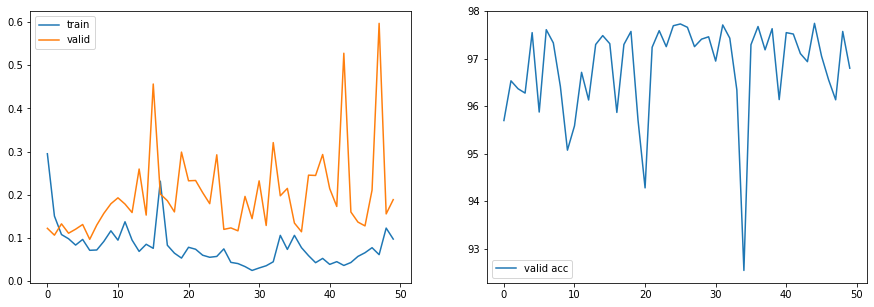

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(valid_acc_list, label='valid acc')
ax2.legend()

In [0]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for i, (images, labels) in enumerate(load_dataset("./test")):
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    valid_losses.append(loss.item())
            
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
            
accuracy = 100*correct/total
print (accuracy)

96.79767103347889
